# Credit card fraud detection EDA (2023)

## Import librairies

In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

matplotlib: 3.5.2
pandas: 1.4.4
sklearn: 1.0.2
seaborn: 0.11.2


In [2]:
from platform import python_version
python_version()

'3.9.13'

In [3]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Explore the data

### Get to know the data : Birds' eye view

In [18]:
df = pd.read_csv("creditcardcsvpresent.csv")

In [5]:
df.shape

(3075, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [7]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [8]:
df.tail()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
3070,6661273532,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N
3074,6661273533,NaN,1500.0,36000.0,Y,0,Y,Y,754,585.0,7,N


In [26]:
df.sample(5)

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
649,3581393535,590.153699,1180.307398,N,0,N,N,0,0.0,0,N
2717,6218861623,158.036008,1264.288061,N,0,Y,N,0,0.0,0,N
98,4151187710,733.491177,35941.067690,N,0,Y,Y,0,0.0,0,Y
2709,6208386624,418.127904,9198.813888,N,0,N,N,0,0.0,0,N
2794,6334449348,756.061854,14365.175230,N,0,N,N,0,0.0,0,N


In [10]:
### The transaction date is null so we are gonna remove it 

In [21]:
df = df.drop(columns=['Transaction date'])

In [22]:
df.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [61]:
df.describe(include='O')

,Is declined,isForeignTransaction,isHighRiskCountry,isFradulent
count,3075,3075,3075,3075
unique,2,2,2,2
top,N,N,N,N
freq,3018,2369,2870,2627


In [13]:
df["Merchant_id"].count()

3075

In [11]:
df["Merchant_id"].nunique()

3015

In [ ]:
### Some merchants appear several times. Why ? 
### Visualize it 

In [25]:
df["Merchant_id"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3070    False
3071    False
3072    False
3073    False
3074    False
Name: Merchant_id, Length: 3075, dtype: bool

In [ ]:
null_transaction = df[df.Transaction_amount == 0]

In [ ]:
null_transaction.describe()

In [ ]:
df = df[df.Transaction_amount > 0]

### Check for missing or null data or duplicate

In [23]:
df.isna().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [24]:
df.isnull().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [27]:
pd.value_counts(df.dtypes)

int64      4
object     4
float64    3
dtype: int64

In [29]:
df.duplicated().sum()

0

## Univariate analysis

array([[<AxesSubplot:title={'center':'Average Amount/transaction/day'}>,
        <AxesSubplot:title={'center':'Transaction_amount'}>],
       [<AxesSubplot:title={'center':'Total Number of declines/day'}>,
        <AxesSubplot:title={'center':'Daily_chargeback_avg_amt'}>],
       [<AxesSubplot:title={'center':'6_month_avg_chbk_amt'}>,
        <AxesSubplot:title={'center':'6-month_chbk_freq'}>]], dtype=object)

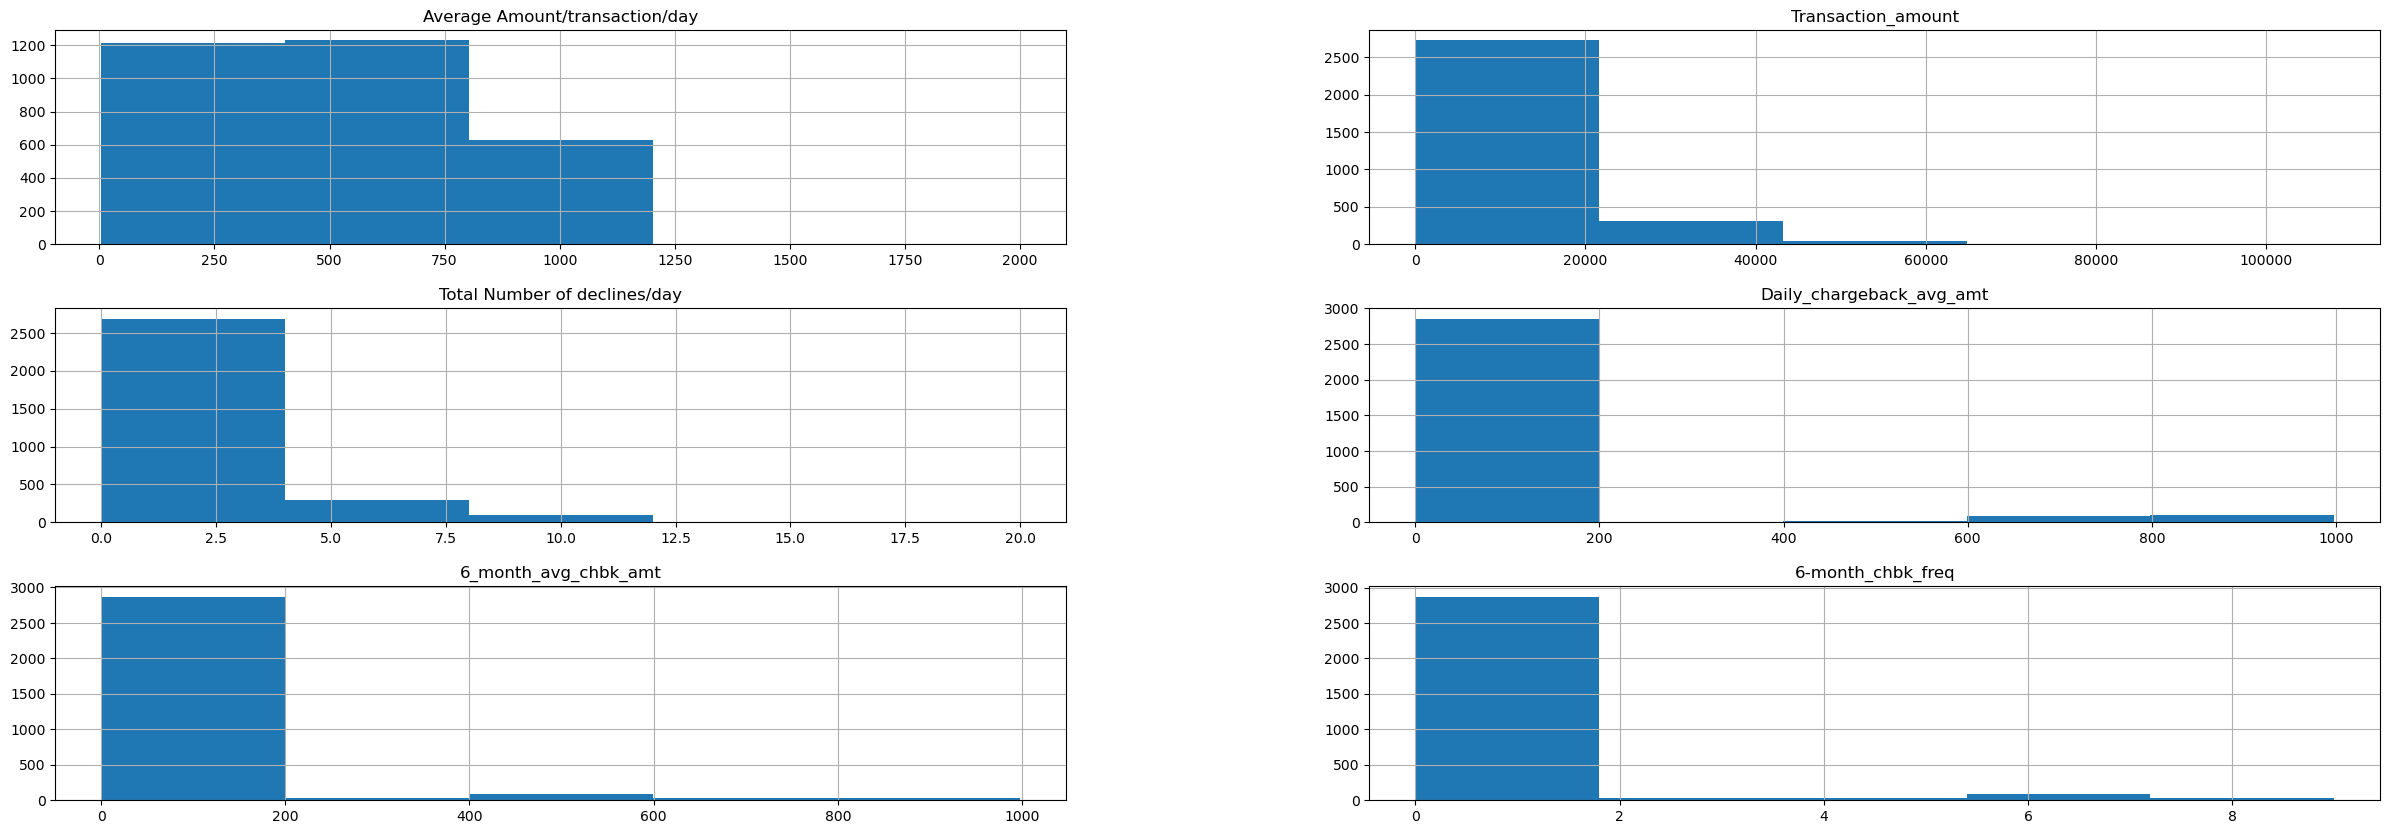

In [39]:
df[['Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent']].hist(bins=5,figsize=(30,10))

In [42]:
def plot_histogram(dataframe,feature):
    sns.histplot(data=dataframe,x=feature,kde=True)   

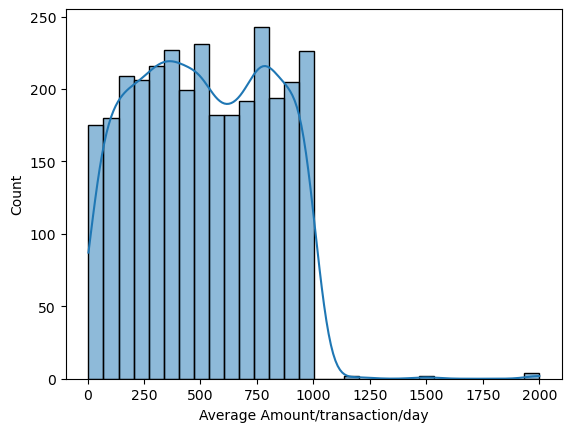

In [43]:
plot_histogram(df,"Average Amount/transaction/day")

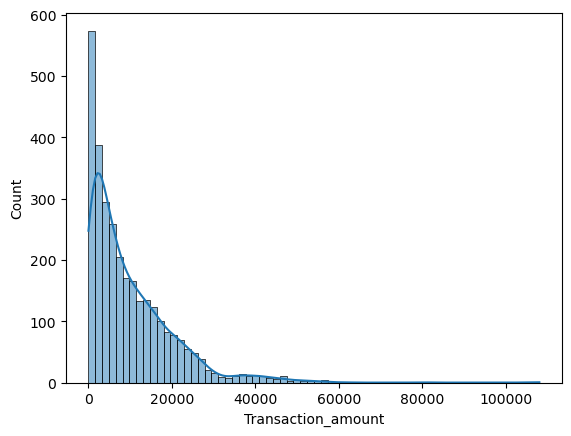

In [44]:
plot_histogram(df,"Transaction_amount")

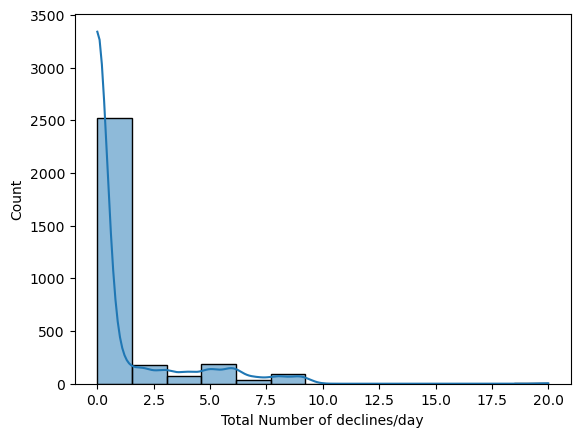

In [47]:
plot_histogram(df,"Total Number of declines/day")

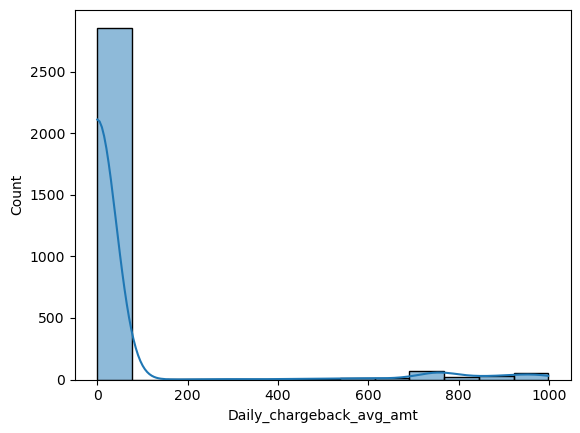

In [50]:
plot_histogram(df,"Daily_chargeback_avg_amt")

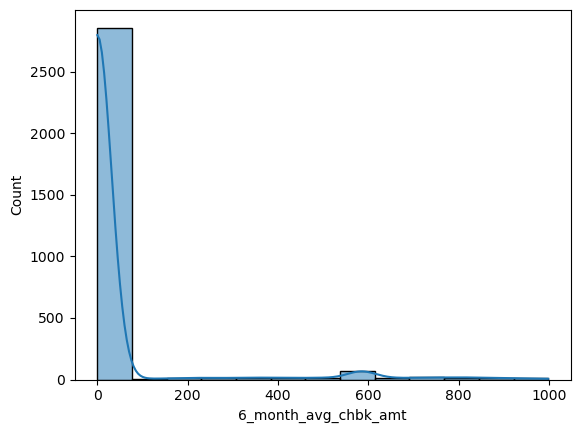

In [51]:
plot_histogram(df,"6_month_avg_chbk_amt")

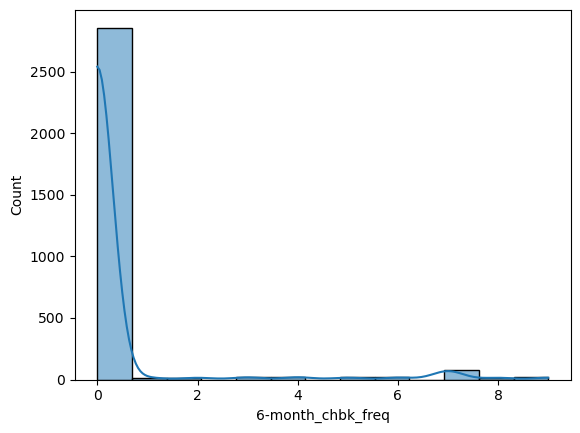

In [52]:
plot_histogram(df,"6-month_chbk_freq")

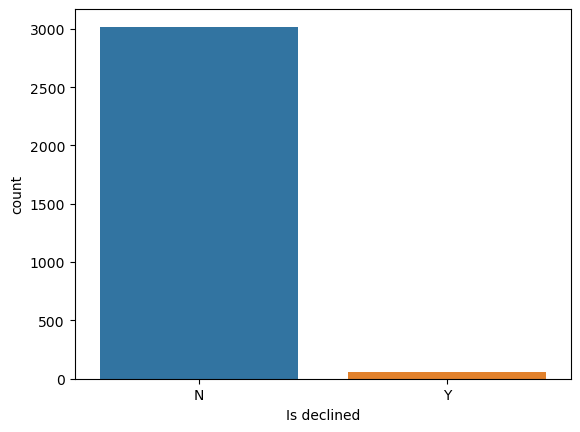

In [55]:
sns.countplot(x='Is declined', data=df);

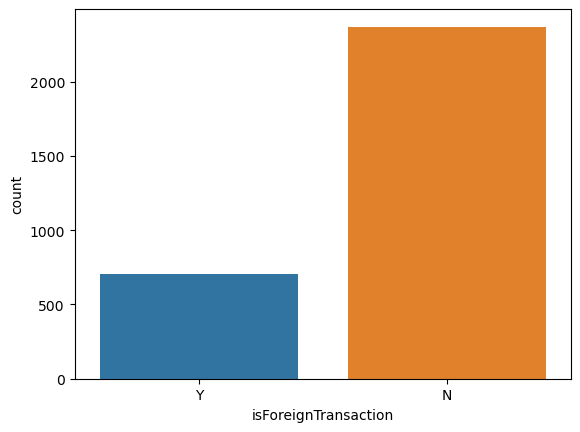

In [56]:
sns.countplot(x='isForeignTransaction', data=df);

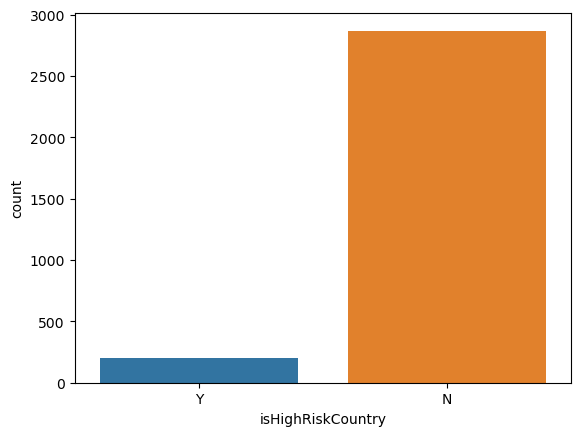

In [57]:
sns.countplot(x='isHighRiskCountry', data=df);

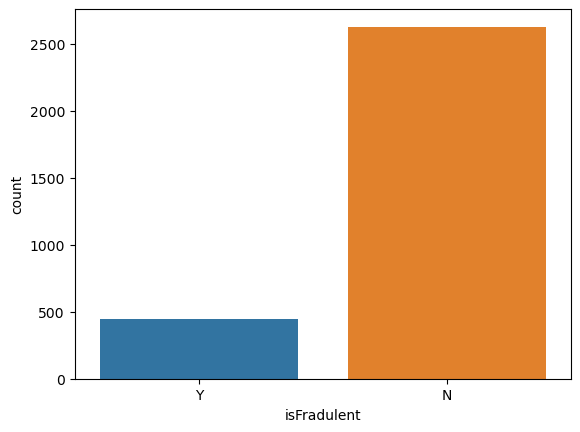

In [58]:
sns.countplot(x='isFradulent', data=df);

In [59]:
df.isFradulent.value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

In [60]:
448/2627

0.1705367339170156

#### Only 17% of transactions are fraudulent, the dataset is unbalanced !

In [ ]:
df[df['isFradulent'] == 'N'].Transaction_amount.plot.hist()

In [ ]:
df[df['isFradulent'] == "Y"].Transaction_amount.plot.hist()

In [ ]:
pd.isnull(df).sum()

#### Let's rename the columns

In [ ]:
df.columns

In [ ]:
df = df.rename(columns={'Is declined':'is_declined','Transaction_amount':'transaction_amount','Total Number of declines/day':'total_number_declines_per_day','isForeignTransaction':'is_foreign_transaction','isHighRiskCountry':'is_high_risk_country','isFradulent':'is_fraudulent','Transaction date':'transaction_date','Average Amount/transaction/day':'average_amount_transaction_day','Daily_chargeback_avg_amt':'daily_chargeback_avg_amt'})

In [ ]:
df.columns

### Feature encoding 

In [ ]:
df['is_fraudulent']=df['is_fraudulent'].replace('N',0)
df['is_fraudulent']=df['is_fraudulent'].replace('Y',1)

In [ ]:
df['is_declined']=df['is_declined'].replace('N',0)
df['is_declined']=df['is_declined'].replace('Y',1)

In [ ]:
df['is_foreign_transaction']=df['is_foreign_transaction'].replace('N',0)
df['is_foreign_transaction']=df['is_foreign_transaction'].replace('Y',1)

In [ ]:
df['is_high_risk_country']=df['is_high_risk_country'].replace('N',0)
df['is_high_risk_country']=df['is_high_risk_country'].replace('Y',1)

In [ ]:
df['is_fraudulent']=df['is_fraudulent'].replace('N',0)
df['is_fraudulent']=df['is_fraudulent'].replace('Y',1)

## Bivariate analysis

## Multivariate analysis

In [ ]:
sns.heatmap(df.corr(),annot=True)

#### Given the correlation heatmap let's drop the average_amount_transaction_day 

In [ ]:
df.drop(['average_amount_transaction_day'], axis=1, inplace=True)

In [ ]:
# Distribution of normal transactions amount

In [ ]:
df.to_csv("df_clean2.csv",sep=',')